In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys

In [2]:
print(sys.version)

3.9.6 (default, May  7 2023, 23:32:45) 
[Clang 14.0.3 (clang-1403.0.22.14.1)]


In [1]:
import tensorflow as tf

/Users/tonychu/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

In [8]:
df_train = pd.read_csv("GUIDE_Train.csv", nrows=10000)
df_test = pd.read_csv("GUIDE_Test.csv", nrows=10000)

In [9]:
df_train.head(5)

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,180388628218,0,612,123247,2024-06-04T06:05:15.000Z,7,6,InitialAccess,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,31,6,3
1,455266534868,88,326,210035,2024-06-14T03:01:25.000Z,58,43,Exfiltration,NaN,FalsePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,1056561957389,809,58352,712507,2024-06-13T04:52:55.000Z,423,298,InitialAccess,T1189,FalsePositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
3,1279900258736,92,32992,774301,2024-06-10T16:39:36.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4,214748368522,148,4359,188041,2024-06-15T01:08:07.000Z,9,74,Execution,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  10000 non-null  int64  
 1   OrgId               10000 non-null  int64  
 2   IncidentId          10000 non-null  int64  
 3   AlertId             10000 non-null  int64  
 4   Timestamp           10000 non-null  object 
 5   DetectorId          10000 non-null  int64  
 6   AlertTitle          10000 non-null  int64  
 7   Category            10000 non-null  object 
 8   MitreTechniques     4201 non-null   object 
 9   IncidentGrade       9947 non-null   object 
 10  ActionGrouped       59 non-null     object 
 11  ActionGranular      59 non-null     object 
 12  EntityType          10000 non-null  object 
 13  EvidenceRole        10000 non-null  object 
 14  DeviceId            10000 non-null  int64  
 15  Sha256              10000 non-null  int64  
 16  IpAdd

In [11]:
missing_values = df_train.isnull().sum()
missing_percentages = 100 * missing_values / len(df_train)

# Display columns with missing values
missing_data = pd.concat([missing_values, missing_percentages], axis=1, keys=['Total', 'Percent'])
print(missing_data[missing_data['Total'] > 0].sort_values('Percent', ascending=False))


                   Total  Percent
ResourceType        9992    99.92
ActionGrouped       9941    99.41
ActionGranular      9941    99.41
ThreatFamily        9923    99.23
EmailClusterId      9881    98.81
AntispamDirection   9823    98.23
Roles               9789    97.89
SuspicionLevel      8462    84.62
LastVerdict         7600    76.00
MitreTechniques     5799    57.99
IncidentGrade         53     0.53


In [12]:
df_train_drop = df_train.drop(columns = ["ResourceType","ActionGranular","ActionGrouped","ThreatFamily","EmailClusterId","AntispamDirection","Roles"])

In [13]:
df_train_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  10000 non-null  int64 
 1   OrgId               10000 non-null  int64 
 2   IncidentId          10000 non-null  int64 
 3   AlertId             10000 non-null  int64 
 4   Timestamp           10000 non-null  object
 5   DetectorId          10000 non-null  int64 
 6   AlertTitle          10000 non-null  int64 
 7   Category            10000 non-null  object
 8   MitreTechniques     4201 non-null   object
 9   IncidentGrade       9947 non-null   object
 10  EntityType          10000 non-null  object
 11  EvidenceRole        10000 non-null  object
 12  DeviceId            10000 non-null  int64 
 13  Sha256              10000 non-null  int64 
 14  IpAddress           10000 non-null  int64 
 15  Url                 10000 non-null  int64 
 16  AccountSid          100

In [14]:
numerical_columns = df_train_drop.select_dtypes(include=['int64']).columns

In [15]:
cat_columns = df_train_drop.select_dtypes(include=['object']).columns

In [16]:
df_train_drop[numerical_columns].nunique().sort_values(ascending=False)

AlertId               9613
Id                    7203
IncidentId            7148
AccountUpn            3386
AccountName           2323
AccountSid            2211
AlertTitle            2205
AccountObjectId       2200
IpAddress             1879
NetworkMessageId      1193
OrgId                 1130
DetectorId             807
FileName               706
DeviceName             686
Url                    603
Sha256                 512
FolderPath             465
DeviceId               375
City                   196
State                  136
CountryCode             68
ApplicationName         23
ApplicationId           21
ResourceIdName          12
RegistryKey             10
OSVersion                6
RegistryValueName        5
RegistryValueData        4
OAuthApplicationId       3
OSFamily                 3
dtype: int64

In [17]:
df_train_drop[cat_columns].nunique().sort_values(ascending=False)

Timestamp          9580
MitreTechniques     182
EntityType           20
Category             17
IncidentGrade         3
LastVerdict           3
EvidenceRole          2
SuspicionLevel        2
dtype: int64

In [18]:
df_train_drop[numerical_columns]

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,DeviceId,Sha256,IpAddress,Url,...,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City
0,180388628218,0,612,123247,7,6,98799,138268,27,160396,...,3421,881,289573,117668,3586,5,66,31,6,3
1,455266534868,88,326,210035,58,43,98799,138268,360606,160396,...,3421,881,289573,117668,3586,5,66,242,1445,10630
2,1056561957389,809,58352,712507,423,298,98799,138268,360606,68652,...,3421,881,289573,117668,3586,5,66,242,1445,10630
3,1279900258736,92,32992,774301,2,2,98799,138268,360606,13,...,3421,881,289573,117668,3586,5,66,242,1445,10630
4,214748368522,148,4359,188041,9,74,98799,138268,360606,160396,...,3421,881,289573,117668,3586,5,66,242,1445,10630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,687194770257,75,394228,871699,0,0,98799,138268,360606,160396,...,3421,881,289573,117668,3586,5,66,242,1445,10630
9996,730144442453,49,29149,18644,1,1,98799,138268,360606,160396,...,3421,881,289573,117668,3586,5,66,242,1445,10630
9997,154618823286,17,56608,133226,20,29882,98799,138268,360606,160396,...,3421,881,289573,117668,3586,5,66,242,1445,10630
9998,120259085306,408,201579,1372581,81,12372,98799,138268,360606,160396,...,8,881,289573,117668,3586,5,66,242,1445,10630


In [19]:
df_train_drop[cat_columns]

,Timestamp,Category,MitreTechniques,IncidentGrade,EntityType,EvidenceRole,SuspicionLevel,LastVerdict
0,2024-06-04T06:05:15.000Z,InitialAccess,NaN,TruePositive,Ip,Related,NaN,NaN
1,2024-06-14T03:01:25.000Z,Exfiltration,NaN,FalsePositive,User,Impacted,NaN,NaN
2,2024-06-13T04:52:55.000Z,InitialAccess,T1189,FalsePositive,Url,Related,Suspicious,Suspicious
3,2024-06-10T16:39:36.000Z,CommandAndControl,NaN,BenignPositive,Url,Related,Suspicious,Suspicious
4,2024-06-15T01:08:07.000Z,Execution,NaN,TruePositive,User,Impacted,NaN,NaN
...,...,...,...,...,...,...,...,...
9995,2024-06-11T16:43:21.000Z,InitialAccess,T1078;T1078.004,FalsePositive,CloudLogonRequest,Related,NaN,NaN
9996,2024-06-07T06:51:11.000Z,InitialAccess,T1566.002,TruePositive,User,Impacted,NaN,NaN
9997,2024-06-07T23:48:32.000Z,Exfiltration,NaN,FalsePositive,User,Impacted,NaN,NaN
9998,2024-06-05T18:43:59.000Z,SuspiciousActivity,NaN,FalsePositive,CloudApplication,Impacted,NaN,NaN


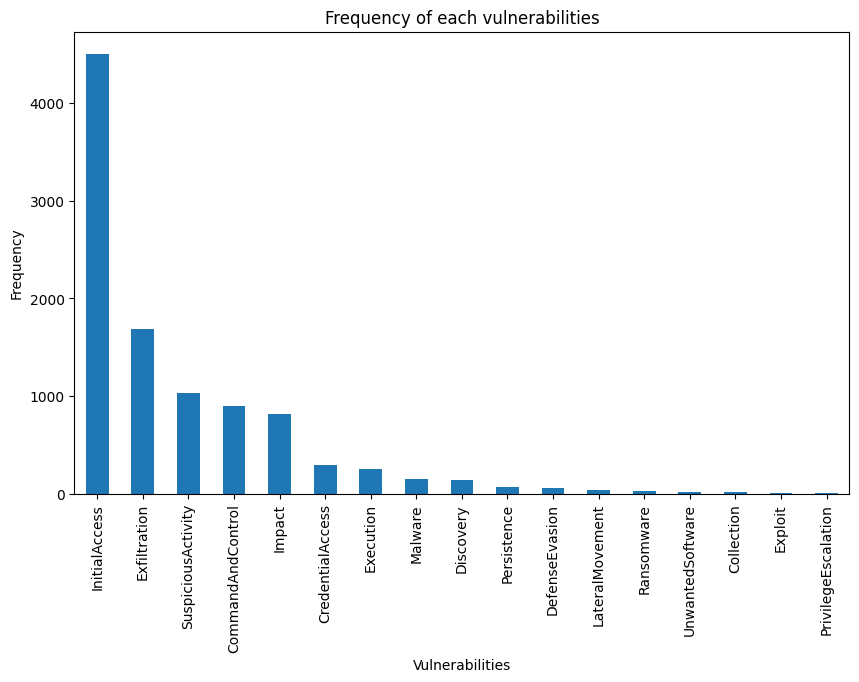

In [20]:
df_train_drop['Category'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.title('Frequency of each vulnerabilities')
plt.xlabel('Vulnerabilities')
plt.ylabel('Frequency')
plt.show()

In [21]:
print(tf.__version__)

2.8.0
